In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity,nan_euclidean_distances 
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#from sklearn.cluster.hierarchical import plot_dendrogram
from sklearn.metrics import pairwise_distances

In [3]:
## read the facebook dataset 
df_facebook = pd.read_csv('facebook.csv', parse_dates=['status_published'])

In [4]:
df_facebook.shape

(7050, 12)

In [5]:
## we can observer there are three categorical variables 
## status_id, status_type and status_published
df_facebook.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [6]:
df_facebook.dtypes

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

In [7]:
df_facebook.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [8]:
## it can be observed that status_id and status_publishes are both unique identifiers for each of the instance
## hence this variable can be used in our analysis so we can drop these variables from our dataset

df_facebook.describe(include=['object', 'datetime'])

<ipython-input-8-af95bd6ecd37>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_facebook.describe(include=['object', 'datetime'])


,status_id,status_type,status_published
count,7050,7050,7050
unique,6997,4,6913
top,819700534875473_995839410594917,photo,2018-03-20 01:54:00
freq,2,4288,3
first,NaN,NaN,2012-07-15 02:51:00
last,NaN,NaN,2018-06-13 01:12:00


In [9]:
df_subset = df_facebook.drop(['status_id', 'status_published'], axis=1)

In [10]:
df_subset.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [11]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


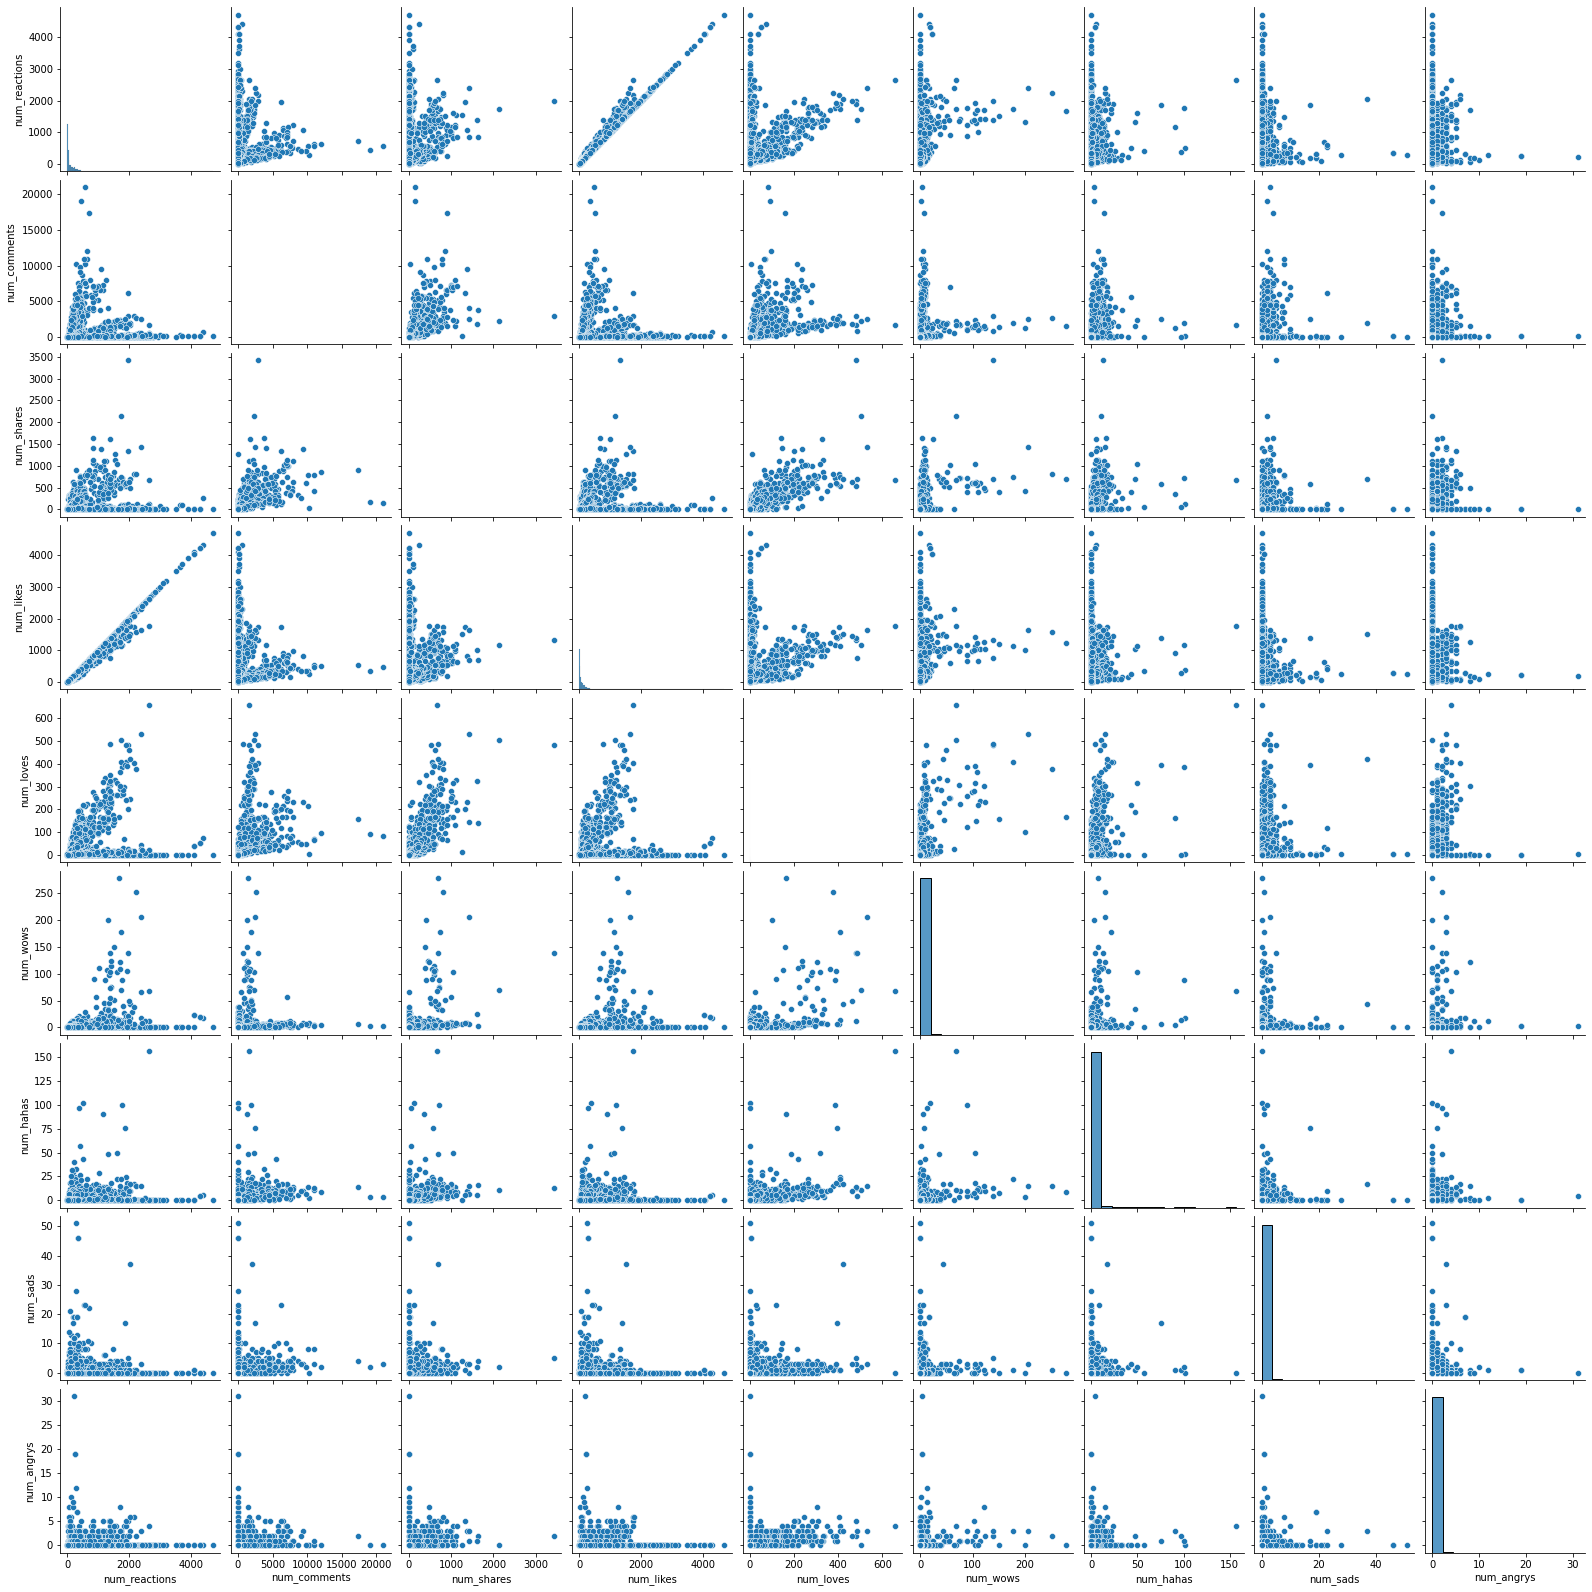

In [11]:
sns.pairplot(df_subset) # their exist a linear reaction b/w num_reactions and num_likes

<AxesSubplot:xlabel='status_type', ylabel='num_shares'>

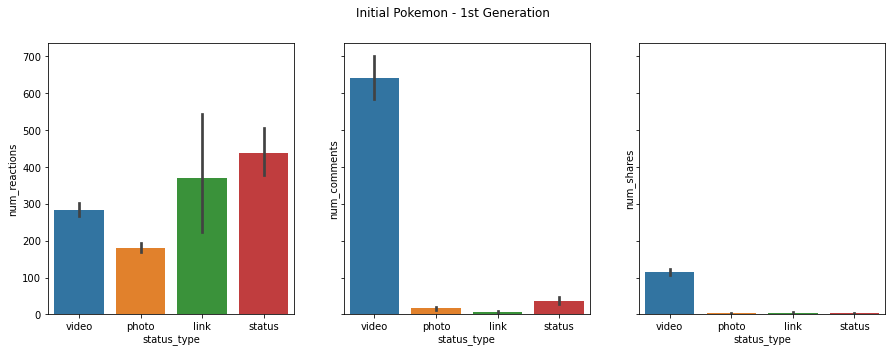

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
cols = df_subset.select_dtypes(include=['int64']).columns.tolist()
    
sns.barplot(x = df_subset.status_type, y = df_subset[cols[0]], ax=axes[0])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[1]], ax=axes[1])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[2]], ax=axes[2])


<AxesSubplot:xlabel='status_type', ylabel='num_wows'>

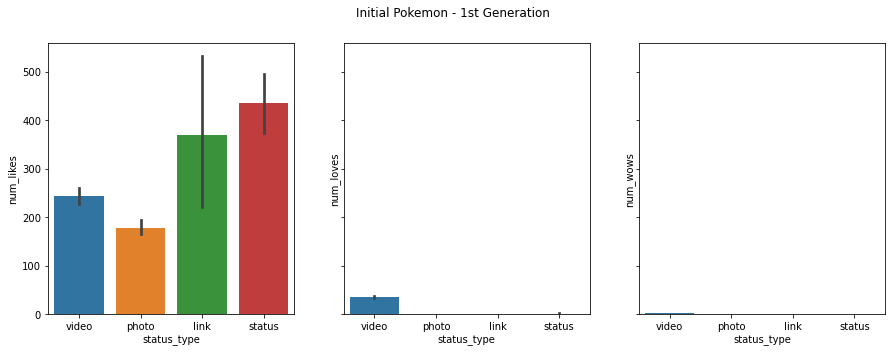

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
cols = df_subset.select_dtypes(include=['int64']).columns.tolist()
sns.barplot(x = df_subset.status_type, y = df_subset[cols[3]], ax=axes[0])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[4]], ax=axes[1])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[5]], ax=axes[2])

<AxesSubplot:xlabel='status_type', ylabel='num_angrys'>

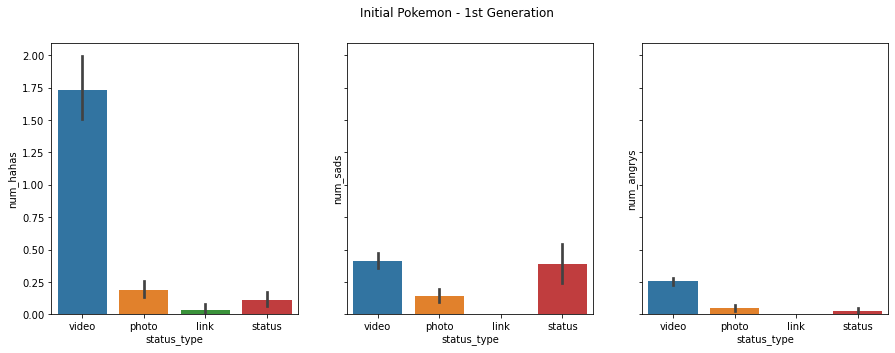

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
cols = df_subset.select_dtypes(include=['int64']).columns.tolist()
sns.barplot(x = df_subset.status_type, y = df_subset[cols[6]], ax=axes[0])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[7]], ax=axes[1])
sns.barplot(x = df_subset.status_type, y = df_subset[cols[8]], ax=axes[2])

C:\Users\pjatthi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status_type', ylabel='count'>

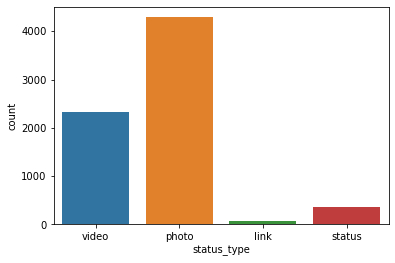

In [15]:
sns.countplot(df_subset.status_type)

In [16]:
X = df_subset
y = df_subset['status_type']

In [17]:
## label encoding the status_type
label_encode = LabelEncoder()
X['status_type'] = label_encode.fit_transform(X['status_type'])
y = label_encode.transform(y)

<AxesSubplot:>

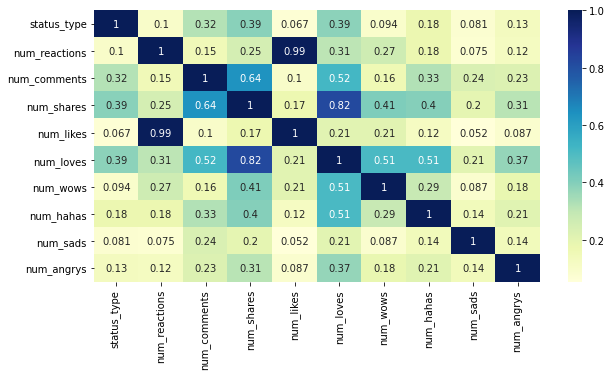

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

In [19]:
#label_encode.inverse_transform(np.unique(y))

In [20]:
cols = X.columns
#scaler = MinMaxScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X = pd.DataFrame(X, columns = [cols])

In [22]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [23]:
cluster = KMeans(n_clusters = 3, init = "random", n_init = 10, max_iter = 300, random_state = 42)
cluster.fit(X)

KMeans(init='random', n_clusters=3, random_state=42)

In [24]:
## it can be observed for the kmean s cluster the model inertia is very high 
## and higher the inertia the model is not a good fit 
cluster.inertia_

44932.669676713864

In [25]:
pred_labels = cluster.labels_

tp = sum(y == pred_labels)

print(tp)

325


In [26]:
## accuracy metrics 

tp/float(y.size) * 100

4.609929078014184

In [27]:
cluster.n_iter_

18

In [28]:
## we use the elbow method to find the optimal inertia 
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

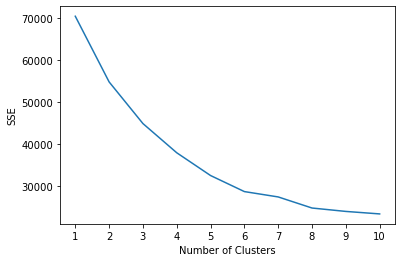

In [29]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
## k-means for k =2, 4,5,6
cluster_n_2 = KMeans(n_clusters=2, **kmeans_kwargs)
cluster_n_2.fit(X)

KMeans(init='random', n_clusters=2, random_state=42)

In [31]:
cluster_n_2.inertia_

54855.68745656181

In [32]:
pred_labels = cluster_n_2.labels_

tp = sum(y == pred_labels)

print(tp)

81


In [33]:
cluster_n_4 = KMeans(n_clusters=4, **kmeans_kwargs)
cluster_n_4.fit(X)

KMeans(init='random', n_clusters=4, random_state=42)

In [34]:
cluster_n_4.inertia_

37975.70710438713

In [35]:
pred_labels = cluster_n_4.labels_

tp = sum(y == pred_labels)

print(tp)

41


In [36]:
cluster_n_5 = KMeans(n_clusters=5, **kmeans_kwargs)
cluster_n_5.fit(X)

KMeans(init='random', n_clusters=5, random_state=42)

In [37]:
cluster_n_5.inertia_

32551.753317149287

In [38]:
pred_labels = cluster_n_5.labels_

tp = sum(y == pred_labels)

print(tp)

31


In [39]:
tp/float(y.size)

0.0043971631205673755

In [40]:
cluster_n_6 = KMeans(n_clusters=6, **kmeans_kwargs)
cluster_n_6.fit(X)

KMeans(init='random', n_clusters=6, random_state=42)

In [41]:
cluster_n_6.inertia_

28728.111705391006

In [42]:
pred_labels = cluster_n_6.labels_

tp = sum(y == pred_labels)

print(tp)

23


In [43]:
cluster_n_7 = KMeans(n_clusters=7, **kmeans_kwargs)
cluster_n_7.fit(X)

KMeans(init='random', n_clusters=7, random_state=42)

In [44]:
cluster_n_7.inertia_

27453.453931734388

In [45]:
pred_labels = cluster_n_7.labels_

tp = sum(y == pred_labels)

print(tp)

90


From the above scenario we can observer that for k=5 is the best fit for our data

 You can check Agglomerative clustering for different linkages (Ward, Complete, Average) and different distance measures (Euclidean, Manhattan, Cosine)

In [46]:
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.440905,0.207286,0.103739,0.541192,0.154870,0.636280,0.062944,0.024611,0.151933,-0.049968
1,-0.760169,-0.175984,-0.256273,-0.309048,-0.147054,-0.323589,-0.150263,-0.178848,-0.155047,-0.158259
2,0.970923,-0.004761,0.009248,0.091150,-0.017359,0.146200,-0.023447,0.054197,-0.107801,-0.110035
3,-0.734472,-0.252806,-0.247610,-0.298601,-0.227276,-0.312651,-0.145184,-0.172802,-0.149806,-0.152909
4,-0.822722,-0.040693,-0.277361,-0.334480,-0.027021,-0.102590,-0.162628,-0.193565,-0.167806,-0.171282


In [47]:
## since the data is huge and many columns are there we apply the principal component analysis 
## for this we need to identify the best component that best suit our data
## we apply pca on all 10 features
pca_all = PCA(n_components=10, random_state=42)
pca_all.fit(data_scaled)

PCA(n_components=10, random_state=42)

In [48]:
X_pca = pca_all.transform(data_scaled)

Text(0, 0.5, 'Explained variance')

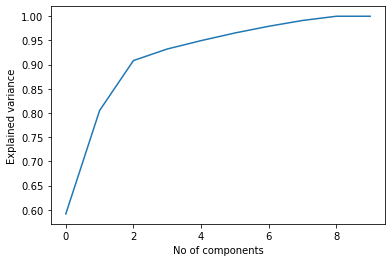

In [49]:
## plot the pca_variance_explained ratio to identify the best no of components
## we can observe that 95% variability in data is preserved for n_components = 6
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Explained variance')

In [50]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(data_scaled)
X_pca_data = pca.transform(data_scaled)

In [51]:
X_pca_data.shape

(7050, 6)

In [52]:
X_principal = pd.DataFrame(X_pca_data) 
X_principal.columns = ['P1', 'P2','P3', 'P4', 'P5', 'P6'] 

 Using ward,complete and average linkage with affinity set to eculidean distance 

In [53]:
## from the dendogram we can see that the 4 cluster can best define the data 
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_principal, method='ward'))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B21D578700> (for post_execute):


KeyboardInterrupt: 

In [ ]:
def silhouette_analysis(method, linkage,min_range, max_range, data):
    silhouette_scores = [] 

    for n_cluster in range(min_range, max_range+1):
        silhouette_scores.append( 
        silhouette_score(data, AgglomerativeClustering(n_clusters = n_cluster, affinity=method,
                                                             linkage=linkage).fit_predict(data))) 
    
    # Plotting a bar graph to compare the results 
    k = range(min_range, max_range+1) 
    plt.bar(k, silhouette_scores) 
    plt.xlabel('Number of clusters', fontsize = 10) 
    plt.ylabel('Silhouette Score', fontsize = 10) 
    plt.show() 

In [ ]:
## we get high silhouette score for cluster = 4 when linkage is ward and affinity is euclidean
silhouette_analysis('euclidean', 'ward', 2, 10, X_principal)

In [73]:
def plot_dendogram(data,linkage, metric):
    plt.figure(figsize=(10, 7))  
    plt.title("Dendrograms")  
    dend = shc.dendrogram(shc.linkage(data, method=linkage,metric=metric))

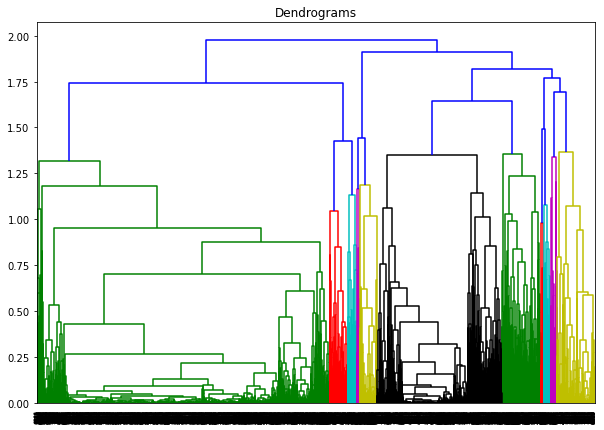

In [74]:
plot_dendogram(X_principal,'complete', 'euclidean')

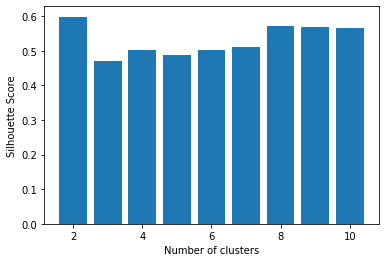

In [75]:
## Running the silhouette analysis on linkage complete
## we get high silhouette score for cluster = 2
silhouette_analysis('euclidean', 'complete', 2, 10, X_principal)

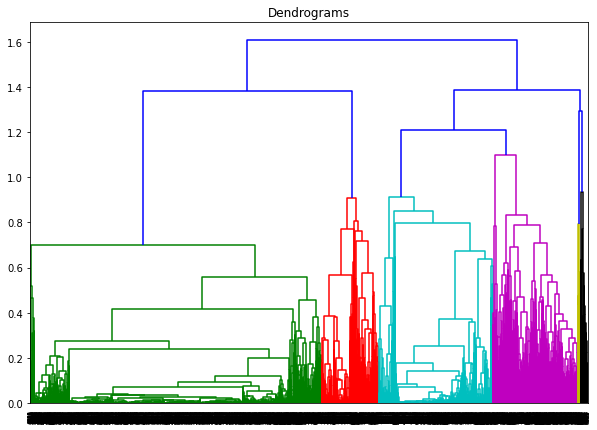

In [76]:
plot_dendogram(X_principal,'average', 'euclidean')

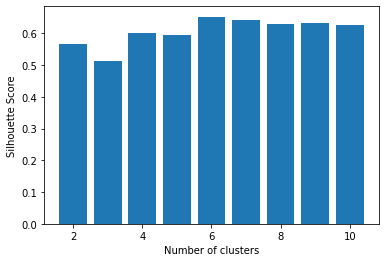

In [77]:
## the silhouette score is max for cluster =6 when we cluster using avergae linkage
silhouette_analysis('euclidean', 'average', 2, 10, X_principal)

#### From the above analysis we can see that the we obtain high silhouette score when average and ward linkage when affinity is
#### euclidean as compared to complete where the clusters are 4 and 6 

In [54]:
silhouette_score(X_principal, AgglomerativeClustering(n_clusters = 4, affinity='euclidean',
                                                             linkage='ward').fit_predict(X_principal))

0.6518593296802416

In [80]:
silhouette_score(X_principal, AgglomerativeClustering(n_clusters = 6, affinity='euclidean',
                                                             linkage='average').fit_predict(X_principal))

0.6526112568922121

### We are getting approximately similar silhouette score with both the linkage (ward & average) but the no of cluster is less in ward. Hence we go ahead with ward linkage when affinity is euclidean 

Running the silhouette analysis when the affinity is cosine and linkage are average, complete

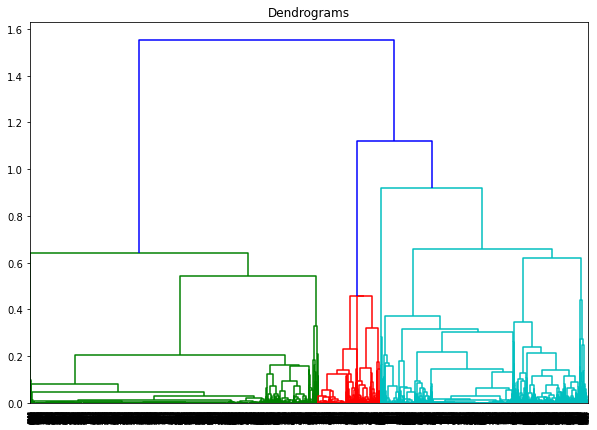

In [81]:
## plotting dendogram when we have linkage average and affinity is cosine 
## from the dendogram we can observe that 5 cluster best defines our data 
plot_dendogram(X_principal,'average', 'cosine')

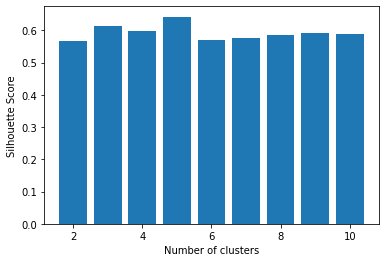

In [82]:
## we can observe we get highest silhouette score for cluster = 5
silhouette_analysis('cosine', 'average', 2, 10, X_principal)

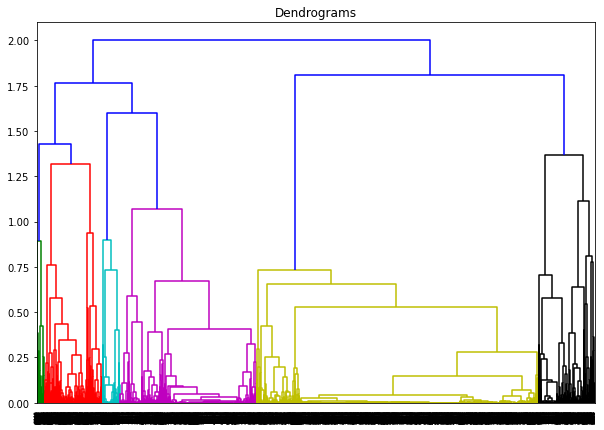

In [83]:
## plotting dendogram when we have linkage average and affinity is cosine 
plot_dendogram(X_principal,'complete', 'cosine')

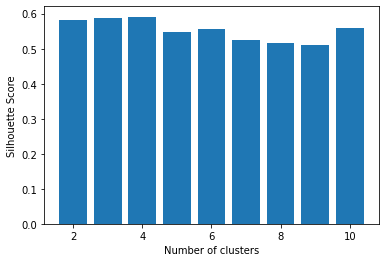

In [84]:
## we can observer that we obtain a similar score for cluster 3 and 4 
silhouette_analysis('cosine', 'complete', 2, 10, X_principal)

In [89]:
silhouette_score(X_principal, AgglomerativeClustering(n_clusters = 5, affinity='cosine',
                                                             linkage='average').fit_predict(X_principal))

0.6422705092017085

In [90]:
print(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = 3, affinity='cosine',
                                                             linkage='complete').fit_predict(X_principal)))
print(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = 4, affinity='cosine',
                                                             linkage='complete').fit_predict(X_principal)))

0.5870405836984186
0.5912620326162414


Running the silhouette analysis when the affinity is manhattan and linkage are average, complete

In [114]:
def calCustomDistance(X, affinity):
    return 1.0 - pairwise_distances(X, X, metric=affinity)

In [119]:
#plot_dendogram(X_principal,'complete', calCustomDistance(X_principal, 'manhattan').all())

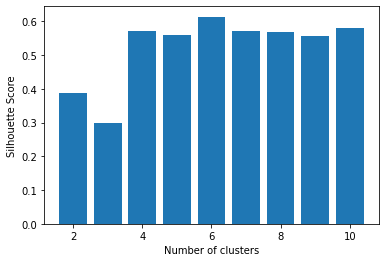

In [92]:
silhouette_analysis('manhattan', 'complete', 2, 10, X_principal)

In [93]:
#plot_dendogram(X_principal,'average', 'manhattan')

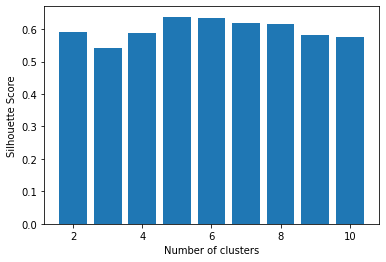

In [94]:
silhouette_analysis('manhattan', 'average', 2, 10, X_principal)

In [96]:
print(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = 6, affinity='manhattan',
                                                             linkage='complete').fit_predict(X_principal)))
print(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = 5, affinity='manhattan',
                                                             linkage='complete').fit_predict(X_principal)))

0.6138019228664653
0.559879766666705


In [106]:
## calculating the silhouette score for ward linkage when affinity is manhattan and cosine
m_distance = calCustomDistance(X_principal, 'manhattan')
c_distance = calCustomDistance(X_principal, 'cosine')

### From above all the cases the ward agorithm with affinity = 'euclidean' distance gave us the best result based on the silhouette score and no of clusters

#### DBSCAN Algorithm 

In [55]:
X_db = df_subset
y_db = df_subset['status_type']

In [56]:
## label encoding the status_type
label_encode_db = LabelEncoder()
X_db['status_type'] = label_encode_db.fit_transform(X_db['status_type'])
y_db = label_encode_db.transform(y_db)

In [57]:
np.unique(y_db)

array([0, 1, 2, 3], dtype=int64)

In [58]:
cols = X_db.columns
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_db = scaler.fit_transform(X_db)
data_scaled_db = pd.DataFrame(X_db, columns = [cols])

In [59]:
## we can calculate the eps values using the Nearest Neighbors and 
## we calculate the minPts either using the domain knowledge or the thumb rule: derive minPts from the number of 
#dimensions D in the data set. minPts >= D + 1. For 2D data, take minPts = 4. For larger datasets, 
# with much noise, it suggested to go with minPts = 2 * D.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scaled_db)
distances, indices = nbrs.kneighbors(data_scaled_db)

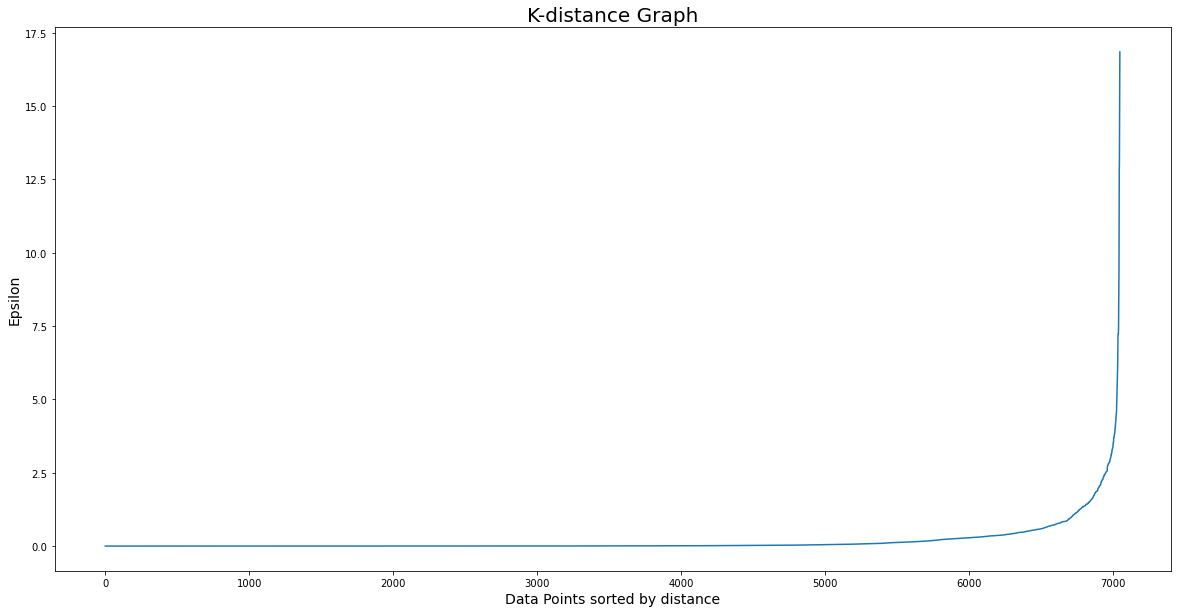

In [60]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [61]:
# we can observe from the above graph that we get maximum eplison value of 1.0
# the minpts for our case will be D+1 (where D is dimension of data) D= 11

dbscan_opt=DBSCAN(eps=1.0,min_samples=11, metric='manhattan')
dbscan_opt.fit(data_scaled_db)

DBSCAN(eps=1.0, metric='manhattan', min_samples=11)

In [62]:
silhouette_score(data_scaled_db, dbscan_opt.fit_predict(data_scaled_db))

0.4116983975694202

In [63]:
dbscan_opt_min=DBSCAN(eps=1.0,min_samples=11, metric='minkowski', p=3)
dbscan_opt_min.fit(data_scaled_db)

DBSCAN(eps=1.0, metric='minkowski', min_samples=11, p=3)

In [64]:
silhouette_score(data_scaled_db, dbscan_opt_min.fit_predict(data_scaled_db))

0.30182358940457615

In [65]:
dbscan_opt_man=DBSCAN(eps=1.0,min_samples=11, metric='manhattan', p=5)
dbscan_opt_man.fit(data_scaled_db)

DBSCAN(eps=1.0, metric='manhattan', min_samples=11, p=5)

In [66]:
silhouette_score(data_scaled_db, dbscan_opt_man.fit_predict(data_scaled_db))

0.4116983975694202

In [67]:
dbscan_ed=DBSCAN(eps=1.0,min_samples=11)
dbscan_ed.fit(data_scaled_db)

DBSCAN(eps=1.0, min_samples=11)

In [68]:
silhouette_score(data_scaled_db, dbscan_ed.fit_predict(data_scaled_db))

0.30924046855020676

From the above dbscan analysis we see that the dbscan algorithm gives a high silhouette score (approx = 41) using the manhattan distance 
with p=5, eps=1.0, min_sample = 11

In [69]:
db = DBSCAN(eps=2.5, min_samples=4, metric='manhattan').fit(data_scaled_db)

In [70]:
silhouette_score(data_scaled_db, db.fit_predict(data_scaled_db))

0.6402266156438841

In [71]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

In [72]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3], dtype=int64)

In [73]:
## we can observe that there are approx 306 records which are outliers to these data 
print("No of clusters:", n_clusters_)
print("Noise present: ", n_noise_)

No of clusters: 4
Noise present:  306


In [74]:
data_scaled_db.drop(['cluster'], axis=1, inplace=True)

KeyError: 'cluster'

In [75]:
data_scaled_db['cluster'] = db.fit_predict(data_scaled_db)

In [76]:
data_scaled_db.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,0
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0
2,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,0
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,0
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,0


# Final clustering choice based on some metric
### Based on all the clustering algorithm run and using silhouette score as the performance metrics agglomerative clustering with linkage = ward and affinity = ecuildean alogrithm gives a better result 

### With dbscan algorithm we get equavilaebt silhouette score and same cluster number(4) as agglomerative this helps in identifying the outliers condition and we can ignore them from our analysis

In [77]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',linkage='ward').fit(X_principal)

In [78]:
y_pred = cluster.fit_predict(X_principal)

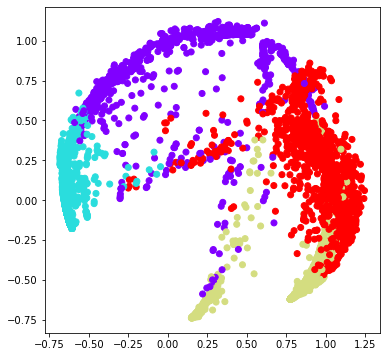

In [79]:
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = y_pred, cmap ='rainbow')
plt.show()

In [80]:
np.unique(y_pred)

array([0, 1, 2, 3], dtype=int64)

In [81]:
cluster.labels_

array([3, 1, 3, ..., 1, 0, 1], dtype=int64)

In [82]:
df_subset['prediction'] = y_pred

In [83]:
df_subset['labels'] = cluster.labels_

In [84]:
df_subset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,prediction,labels
0,3,529,512,262,432,92,3,1,1,0,3,3
1,1,150,0,0,150,0,0,0,0,0,1,1
2,3,227,236,57,204,21,1,1,0,0,3,3
3,1,111,0,0,111,0,0,0,0,0,1,1
4,1,213,0,0,204,9,0,0,0,0,1,1


In [85]:
df_subset['status_type_inv'] = label_encode.inverse_transform(y)

In [86]:
df_subset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,prediction,labels,status_type_inv
0,3,529,512,262,432,92,3,1,1,0,3,3,video
1,1,150,0,0,150,0,0,0,0,0,1,1,photo
2,3,227,236,57,204,21,1,1,0,0,3,3,video
3,1,111,0,0,111,0,0,0,0,0,1,1,photo
4,1,213,0,0,204,9,0,0,0,0,1,1,photo


In [87]:
label_encode.inverse_transform([0,1,2,3])

array(['link', 'photo', 'status', 'video'], dtype=object)

In [88]:
df_subset.to_csv('clustering_result.csv', index=False)

In [89]:
df_subset.drop(columns = ['prediction', 'labels'], axis=1, inplace=True)

### plotting db scan prediction with two clusters  

In [90]:
df_subset['cluster'] = db.fit_predict(data_scaled_db)

<AxesSubplot:>

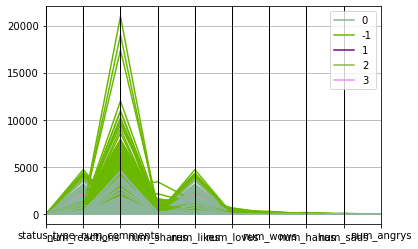

In [91]:
pd.plotting.parallel_coordinates(df_subset.drop(['status_type_inv'], axis=1), 'cluster')

In [92]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(df_subset.drop(['status_type_inv'], axis=1))

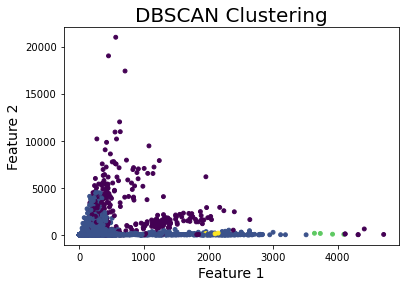

In [93]:
# Plotting the resulting clusters
#plt.figure(figsize=(10,10))
plt.scatter(df_subset['num_reactions'],df_subset['num_comments'],
            c=df_subset['cluster'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [94]:
df_subset.to_csv('result_1.csv')

## Inferences for agglomerative clustering with linkage=ward
1. We can observe a lot of overlapping in cluster 0
2. Cluster 2 comprises of the features where status is of type video (num loves ranges from 0 to 25) and status
3. Cluster 3 comprises of the features where status is of type video, status and photos 
4. Using these clusters we can identify classify the status type on the basis of reaction, likes and share into high, low, 
neutral and medium

In [95]:
## outliers is obtained for status type video, status, photos

df_subset.loc[df_subset['cluster'] == -1]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_inv,cluster
6,3,503,614,72,418,70,10,2,0,3,video,-1
45,3,372,456,37,334,31,1,1,1,4,video,-1
99,3,1493,1979,753,1333,139,9,3,8,1,video,-1
128,3,688,0,0,632,34,0,0,22,0,video,-1
140,3,226,449,37,189,25,1,1,10,0,video,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
6910,3,251,4642,184,211,33,2,2,2,1,video,-1
6915,3,205,2635,146,171,29,1,1,1,2,video,-1
6955,3,266,5000,153,234,27,2,1,1,1,video,-1
6964,3,211,4487,135,186,22,1,0,1,1,video,-1


In [96]:
df_subset.groupby('cluster').agg(['mean'])

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
-1,2.735294,855.359477,2808.19281,425.401961,695.153595,129.702614,16.627451,9.156863,3.049020,1.650327
0,1.658200,198.509507,107.15612,22.532828,190.047237,7.420529,0.578283,0.312686,0.105318,0.043523
1,1.000000,168.500000,0.50000,9.500000,147.750000,1.750000,0.000000,0.000000,19.000000,0.000000
2,3.000000,3845.500000,117.25000,53.000000,3845.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,2041.000000,139.25000,11.250000,1991.500000,21.500000,27.250000,0.750000,0.000000,0.000000


In [97]:
df_subset.mean()

status_type        1.704965
num_reactions    230.117163
num_comments     224.356028
num_shares        40.022553
num_likes        215.043121
num_loves         12.728652
num_wows           1.289362
num_hahas          0.696454
num_sads           0.243688
num_angrys         0.113191
cluster           -0.040000
dtype: float64